<a href="https://colab.research.google.com/github/itsmekarishma/itsmekarishma/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

**Data Collection & Analysis**

In [4]:
#loading the data from csv to a pandas DataFrame 
insurance_dataset = pd.read_csv("/content/insurance.csv")

In [5]:
# First 5 rows of the DataFrame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Number of rows and columns
insurance_dataset.shape

(1338, 7)

In [8]:
# Getting some information about the dataset 
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features :


*   Sex
*   Smoker
*   Region


In [10]:
# Checking for missing values 
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data Analysis**

In [13]:
# Statistical measures of the dataset 
insurance_dataset.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


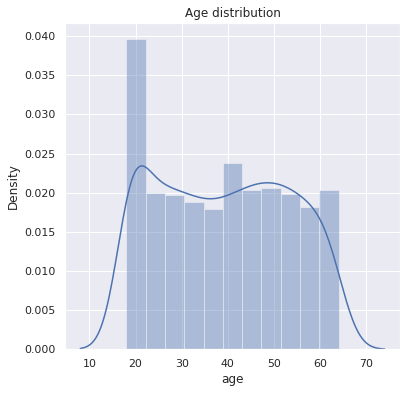

In [16]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age']) #tell us how the values are distributed in the dataset 
plt.title('Age distribution')
plt.show()

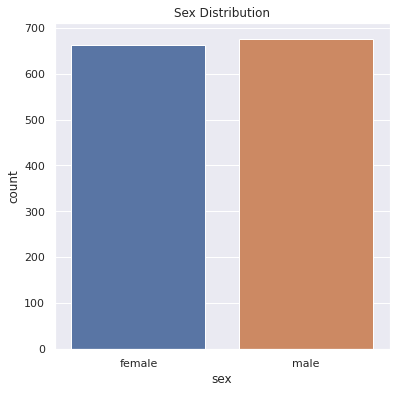

In [17]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset) # gives number of values for male and number of values for female
plt.title('Sex Distribution')
plt.show()

In [19]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


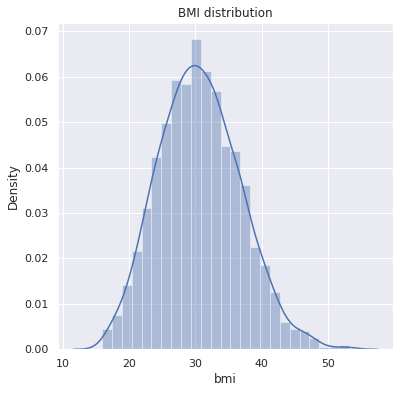

In [20]:
# distribution of bmi value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi']) #tell us how the values are distributed in the dataset 
plt.title('BMI distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

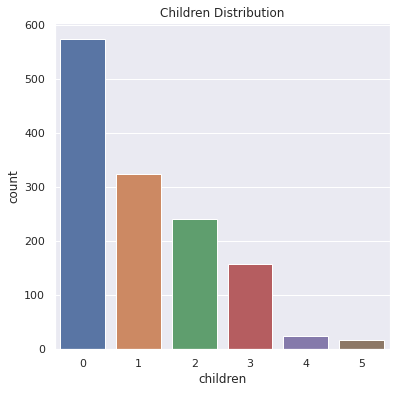

In [21]:
#Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset) # gives number of values for children
plt.title('Children Distribution')
plt.show()

In [22]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

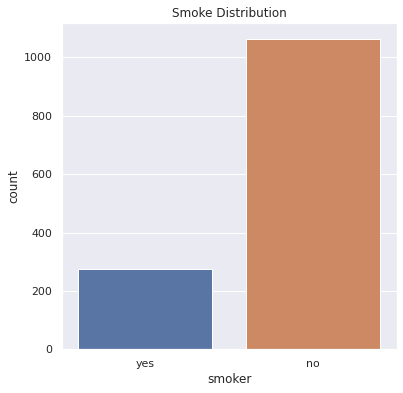

In [23]:
#Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset) # gives number of values for smoker
plt.title('Smoke Distribution')
plt.show()

In [24]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

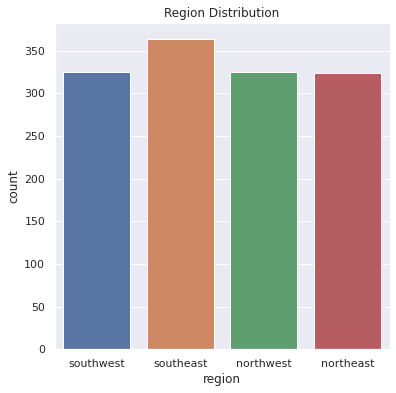

In [25]:
# Region distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [26]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


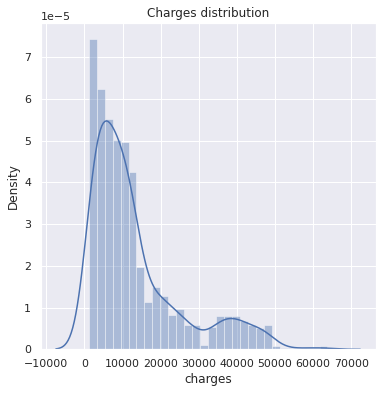

In [27]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges']) #tell us how the values are distributed in the dataset 
plt.title('Charges distribution')
plt.show()

**Data Pre-Processing**

**Encoding the categorical features**

In [28]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [29]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


**Splitting the features and target**

In [30]:
X = insurance_dataset.drop(columns='charges',axis=1)
y = insurance_dataset['charges'] 

In [31]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [32]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


**Splitting the data into training & Testing data**

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [36]:
#loading the Linear Regression model
regressor = LinearRegression()

In [37]:
regressor.fit(X_train,y_train)

LinearRegression()

**Model Evaluation**

In [38]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [39]:
# R squared value - lies between 0 & 1
r2_train = metrics.r2_score(y_train,training_data_prediction)
print("R Squared value :",r2_train)

R Squared value : 0.751505643411174


In [40]:
# prediction on test data
testing_data_prediction = regressor.predict(X_test)

In [41]:
# R squared value 
r2_test= metrics.r2_score(y_test,testing_data_prediction)
print("R Squared value :",r2_test)

R Squared value : 0.7447273869684077


**Building a predictive system**

In [45]:
input_data = (20,1,28.785,0,1,2)

#changing input_data to a numpy array
input_data_to_numpy_array= np.asarray(input_data)

# reshape the array
input_data_reshape = input_data_to_numpy_array.reshape(1,-1)

#we are giving one data point therefore we reshape to (1,-1)

prediction = regressor.predict(input_data_reshape)
print(prediction)

print('The insurance cost in USD :', prediction[0])

[2425.88729094]
The insurance cost in USD : 2425.887290937846


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
